# About

Here is my work for the review of the client's idea.

I used the original dataset supplied by the client at the URL below:

```
https://raw.githubusercontent.com/Btibert3/datasets/master/phone-reviews1k.csv
```

In [161]:
# imports
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [162]:
# bring in the data
df = pd.read_csv("https://raw.githubusercontent.com/Btibert3/datasets/master/phone-reviews1k.csv")

In [163]:
# shape
df.shape

(1000, 2)

In [164]:
# sample
df.sample(3)

,reviews,ratings
497,Battery backup is worst. Won't recommend it.. ...,1
997,Iphone doesn't need any major review as it's a...,4
295,Absolute beast!!!!Performance is top notch. Ca...,5


In [165]:
# data cleaning
df.dropna(inplace=True)

In [166]:
# tokenize the text
cv = CountVectorizer(max_features=30)
dtm = cv.fit_transform(df.reviews).toarray()

In [167]:
# make a dataset for the model
df2 = pd.DataFrame(dtm, columns=cv.get_feature_names_out())


In [168]:
# quick confirmation
df2.sample(3)

,and,apple,as,awesome,battery,best,but,camera,for,good,...,performance,phone,product,read,the,this,to,very,with,you
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [169]:
# fit the model
tree = DecisionTreeClassifier(min_samples_leaf=1000, min_samples_split=2000, random_state=820)
tree.fit(df2, df.ratings)

DecisionTreeClassifier(min_samples_leaf=1000, min_samples_split=2000,
                       random_state=820)

In [170]:
# how well do the model do?
cr = metrics.classification_report(df.ratings, tree.predict(df2))
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00       189
           5       0.69      1.00      0.82       695

    accuracy                           0.69      1000
   macro avg       0.14      0.20      0.16      1000
weighted avg       0.48      0.69      0.57      1000



 - 69% accurate
 - perfect recall on the top rating of 5!


 > My opinion is that we can work with the client to deploy the sampling strategy via the app, as we can predict the ratings well enough when there isn't one supplied.

In [171]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# compression
from sklearn.decomposition import PCA

# text imports
import spacy
from spacy import cli
from spacytextblob.spacytextblob import SpacyTextBlob
import textdescriptives as td
import tokenwiser

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import gensim

from afinn import Afinn
from newspaper import Article

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexandervonschwerdtner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandervonschwerdtner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [172]:
df.head()

,reviews,ratings
0,Voice not clear....READ MORE,3
1,It’s my 5th iPhone. Compact beast as usual.REA...,5
2,It has a13 bionic but surprisingly antutu scor...,5
3,Flipkart was decreasing the value of iphoneREA...,5
4,The first apple phone after 10 long years of a...,4


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
 1   ratings  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


<AxesSubplot:xlabel='ratings', ylabel='count'>

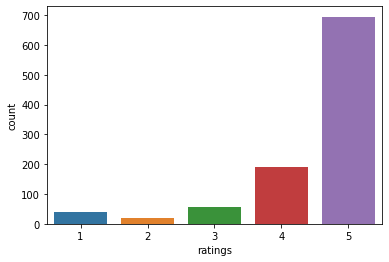

In [174]:
# what do we have for categories
sns.countplot(x="ratings", data=df)

In [175]:
# quick review, what is distro of sentiment
df.ratings.value_counts(dropna=False)

5    695
4    189
3     56
1     41
2     19
Name: ratings, dtype: int64

In [176]:
train, test = train_test_split(df, test_size=.33, random_state=820, stratify=df.ratings)

In [177]:
# lets build a pipeline from sklearn to classify the messages

steps = [("cv", CountVectorizer(max_features=1500)), 
         ("clf", DecisionTreeClassifier(max_depth=5, 
                                        min_samples_leaf=1000, 
                                        min_samples_split=2000, 
                                        random_state=820))]

pipe = Pipeline(steps)

In [178]:
# fit the model - use spacy to 
pipe.fit(train.reviews, train.ratings)

Pipeline(steps=[('cv', CountVectorizer(max_features=1500)),
                ('clf',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=1000,
                                        min_samples_split=2000,
                                        random_state=820))])

In [179]:
preds = pipe.predict(test.reviews)

In [180]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds, test.ratings)
accuracy

0.693939393939394

In [181]:
# how well do the model do?
cr = metrics.classification_report(test.ratings,preds)
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        62
           5       0.69      1.00      0.82       229

    accuracy                           0.69       330
   macro avg       0.14      0.20      0.16       330
weighted avg       0.48      0.69      0.57       330

